# 第三章深度学习基础（一） 

## 3.1线性回归 

### 3.1.1线性回归的基本要素

以简单的房屋价格预测作为例子来解释线性回归的基本要素。预测一栋房子的售出价格，取决于很多因素，如房屋状况、地段、市场行情等。假设价格只取决于房屋状况的两个因素，即面积（平方米）和房龄（年）。

#### 3.1.1.1 模型定义

设房屋的面积为$x_1$，房龄为$x_2$，售出价格为$y$。我们需要建立基于输入$x_1$和$x_2$来计算输出$y$的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$\hat{y}=x_1 \omega_1+x_2 \omega_2+b$$
其中$\omega_1$和$\omega_2$是权重（weight），$b$是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出$\hat{y}$是线性回归对真实价格$y$的预测或估计。我们通常允许它们之间有一定误差。

#### 3.1.1.2 模型训练

通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

(1)训练数据

假设我们采集的样本数为$n$,索引为$i$的样本的特征为$x_1^{(i)}$和$x_2^{(i)}$,标签为$y^{(i)}$。对于索引为$i$的房屋，线性回归模型的房屋价格预测表达式：
$$\hat{y}^{(i)}=x_1^{(i)}\omega_1+x_2^{(i)}\omega_2+b$$

(2)损失函数

通常我们会选取一个非负数作为误差来衡量预测值与真实值之间的误差，常用的选择是平方函数。

$$\iota^{(i)}(\omega_1,\omega_2,b)=\frac{1}{2}(\hat{y}^{(i)}-y^{(i)})^{2}$$

常数$\frac{1}{2}$使对平方项求导后的常数系数为1。

通常我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即：

$$\iota (\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^{n}\iota ^{(i)}(\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(x_1^{(i)}\omega_1+x_2^{(i)}\omega_2+b-y^{(i)})^{2}$$

(3)优化算法

当模型和损失函数形式较为简单时，误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量(mini-batch)B ，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

模型的每个参数将作如下迭代：
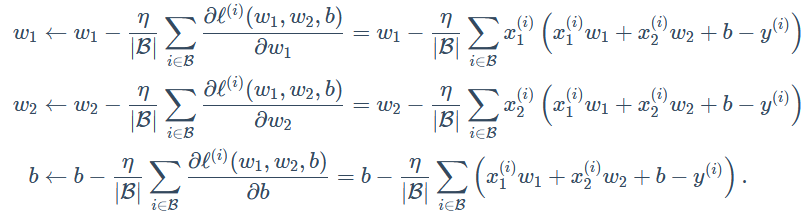

超参数：|B|代表每个小批量中的样本个数，$\eta $称作学习率并取正数。调参指的是调节超参数

#### 3.1.1.3 模型预测

模型训练完成后，模型参数$\omega_1,\omega_2,b$在优化算法停止时的值分别记作$\hat{\omega_1},\hat{\omega_2},\hat{b}.$(不一定是最优解)

### 3.1.2线性回归的表示方法 

#### 3.1.2.1 神经网络图

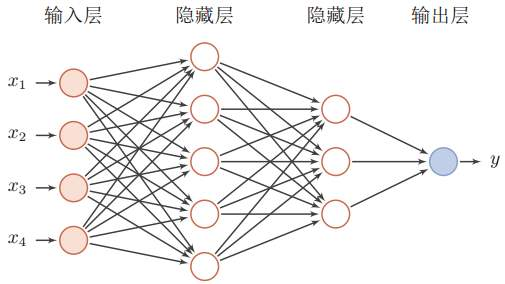

#### 3.1.2.2 矢量计算表达式 

向量相加的两种方法：

In [10]:
import torch
from time import time #计算运算时间

a=torch.ones(1000)
b=torch.ones(1000)

#1、将两个向量按元素逐一做标量加法
start=time()
c=torch.zeros(1000)
for i in range(1000):
    c[i]=a[i]+b[i]
print(time()-start)

0.009996175765991211


In [12]:
#2、将两个向量直接做矢量加法,时间更短
a=torch.ones(1000)
b=torch.ones(1000)
start=time()
d = a + b
print(time()-start)

0.0


如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到:

$$\hat{y}^{(1)}=x_1^{(1)}\omega_1+x_2^{(1)}\omega_2+b$$
$$\hat{y}^{(2)}=x_1^{(2)}\omega_1+x_2^{(2)}\omega_2+b$$
$$\hat{y}^{(3)}=x_1^{(3)}\omega_1+x_2^{(3)}\omega_2+b$$

将上面3个等式转化为矢量计算。设：
$\hat{y}=\begin{bmatrix}
\hat{y^{(1)}}\\
\hat{y^{(2)}}\\ 
\hat{y^{(3)}}\\
\end{bmatrix}$ ,$X=
\begin{bmatrix}
 x_{1}^{(1)}&x_2^{(1)} \\ 
 x_{1}^{(2)}&x_2^{(2)}  \\ 
 x_{1}^{(3)}&x_2^{(3)}  
\end{bmatrix}$,
$
\omega=
\begin{bmatrix}
\omega_1\\
\omega_2 
\end{bmatrix}
$

当数据样本数为$n$，特征数为$d$时，线性回归的矢量计算表达式为:
$$\hat{y}=\omega X+b$$

其中模型输出$\hat{y}\in \mathbb{R}^{n\times1}$,  批量数据样本特征$X\in \mathbb{R}^{n\times d}$，权重$\omega \in \mathbb{R}^{d\times 1}$ ， 偏差$ b \in \mathbb{R}$。相应地，批量数据样本标签$y \in \mathbb{R}^{n\times1}$ 。设模型参数$\theta=[\omega_1,\omega_2,b]^{T}$，我们可以重写损失函数为:
$$\iota (\theta)=\frac{1}{2n}(\hat{y}-y)^{T}(\hat{y}-y)$$

小批量随机梯度下降的迭代步骤将相应地改写为:
   $$ \theta\leftarrow \theta-\frac{\eta }{|B|}\sum_{i\in B}\bigtriangledown_{\theta}\iota ^{(i)}(\theta)$$

其中梯度是有关3个为标量的模型参数的偏导数组成的向量： 损失函数为平方损失函数

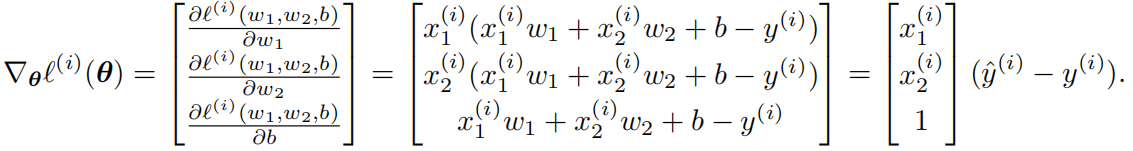